In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

In [2]:
dataFrame = pd.read_csv("../data/charging_sessions.csv", parse_dates=["connectionTime", "disconnectTime", "doneChargingTime"])


In [3]:
dataFrame["duration"] = dataFrame["disconnectTime"] - dataFrame["connectionTime"]

In [4]:
dfSiteOne = dataFrame[dataFrame["siteID"] == 1]
dfSiteOne[["duration", "kWhDelivered"]].describe()

,duration,kWhDelivered
count,35042,35042.000000
mean,0 days 06:51:58.727812339,14.063156
std,0 days 03:29:58.124202279,11.052229
min,0 days 00:03:03,0.502000
25%,0 days 04:00:12,6.478500
50%,0 days 07:36:06.500000,11.210500
75%,0 days 09:33:30.750000,17.340000
max,3 days 09:04:37,108.797242


In [5]:
dfSiteTwo = dataFrame[dataFrame["siteID"] == 2]
dfSiteTwo[["duration", "kWhDelivered"]].describe()

,duration,kWhDelivered
count,31408,31408.000000
mean,0 days 05:39:11.600292919,9.249425
std,0 days 05:57:48.893309305,8.752038
min,0 days 00:02:04,0.501000
25%,0 days 01:52:07,3.402000
50%,0 days 04:44:03,6.715000
75%,0 days 08:28:02.750000,12.941750
max,10 days 05:16:09,77.700000


C:\Users\malte\AppData\Local\Temp\ipykernel_14724\758266735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSiteOne["dayOfWeek"] = dfSiteOne["connectionTime"].dt.day_name()
C:\Users\malte\AppData\Local\Temp\ipykernel_14724\758266735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSiteTwo["dayOfWeek"] = dfSiteTwo["connectionTime"].dt.day_name()


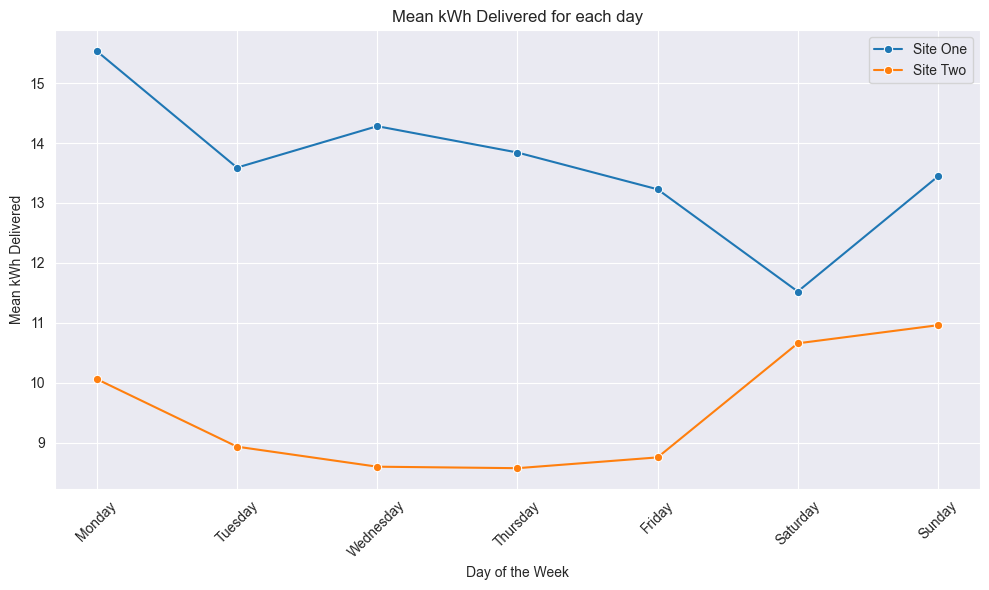

In [6]:
dfSiteOne["dayOfWeek"] = dfSiteOne["connectionTime"].dt.day_name()
dfSiteTwo["dayOfWeek"] = dfSiteTwo["connectionTime"].dt.day_name()

site_one_means = dfSiteOne.groupby("dayOfWeek")["kWhDelivered"].mean()
site_two_means = dfSiteTwo.groupby("dayOfWeek")["kWhDelivered"].mean()

ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
site_one_means = site_one_means.reindex(ordered_days)
site_two_means = site_two_means.reindex(ordered_days)

plt.figure(figsize=(10, 6))
sb.lineplot(data=site_one_means, label="Site One", marker="o")
sb.lineplot(data=site_two_means, label="Site Two", marker="o")

plt.xlabel("Day of the Week")
plt.ylabel("Mean kWh Delivered")
plt.title("Mean kWh Delivered for each day")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()